In [2]:
import pandas as pd
import numpy as np

import urllib.request

import json

from pandas import ExcelWriter
from pandas import ExcelFile

import seaborn as sns
import matplotlib.pyplot as plt
 
dataset = 'data/dataIteration1.xlsx'

# Load the dataset
df = pd.read_excel(dataset)

# Clear personal numbers for privacy reasons
df.Personnr = df.Personnr.map(lambda x: (str(x)[0:10]))
df.Personnr = pd.to_numeric(df.Personnr, errors='coerce')

# All cities to lowercase
df.Postadress_ort = df.Postadress_ort.str.lower()

# Create attribute for age
df["Alder"] = df.Personnr.map(lambda x: (2019-float(str(x)[0:4])))

# Drop all missing values
df = df.dropna(axis='index')

# Drop all wrongly formatted birth dates
df = df.drop(df.loc[df['Personnr'] < 19000101].index)

# Exclude users like the dialer
exclude_users = [99, 100, 102, 108, 168]

for user in exclude_users:
    df = df.drop(df.loc[df['Anvandare_ID'] == user].index)

# Format yes/no to easy calculate hit rate
df["Ja"]  = df.Utfall.map(lambda x: 1 if x == "Bokning" else 0)
df["Nej"] = df.Utfall.map(lambda x: 1 if x == "Nej" else 0)

# Rename columns
df.rename(columns={'Anvandare_ID':'User_ID', 'Postadress_ort':'Ort', 'Postadress_postnr':'Postnr'}, inplace=True)

# Save to csv
df.to_csv('data.csv', index=False)
df

,Utfall,Antal_KF,Kund_ID,User_ID,Personnr,Postadress,Ort,Postnr,Alder,Ja,Nej
1231,Inte aktuell,4,418583,145,19791225.0,Myggdansvägen 1 I,gävle,80264,40.0,0,0
1240,Inte aktuell,4,418346,145,19760701.0,Falkvägen 13 A,gävle,80264,43.0,0,0
1241,Fel,1,487988,105,19580108.0,Skogsfruvägen 11,gävle,80264,61.0,0,0
1243,Utringd,4,417159,145,19910812.0,Hillmansgatan 11 B lgh 1102,gävle,80281,28.0,0,0
1247,Nej,4,417659,105,19880125.0,Brynäsgatan 8 B lgh 1205,gävle,80280,31.0,0,1
1249,Inte aktuell,1,487690,105,19960811.0,Norra Skeppargatan 4 lgh 1003,gävle,80320,23.0,0,0
1250,Utringd,4,418115,107,19910904.0,Hillmanskroken 6 lgh 1001,gävle,80282,28.0,0,0
1251,Inte aktuell,1,487695,145,19900318.0,Femte Tvärgatan 34 B lgh 1201,gävle,80284,29.0,0,0
1258,Fel,1,488367,107,19840901.0,Almvägen 6,gävle,80269,35.0,0,0
1259,Utringd,3,418816,145,19750303.0,Hillmanskroken 8 A lgh 1201,gävle,80282,44.0,0,0


In [3]:
# PERFORMANCE LOCATION

df_location = pd.read_csv('data.csv')

# Only calls that are hits or none hits
df_location = pd.concat([df_location.loc[df_location['Utfall'] == 'Bokning'], df_location[df_location['Utfall'] == 'Nej']])

# Aggregate data on location
aggregation_functions = {'Ort': 'first', 'Ja': 'sum', 'Nej': 'sum'}

# Group data by location
df_location = df_location.groupby(df_location['Ort']).aggregate(aggregation_functions)

# Calculate hit rate per age
df_location['Hit_Rate'] = df_location['Ja'] / (df_location['Nej'] + df_location['Ja'])

# Plot histogram
# ax = df_location.plot.bar(x='Postadress_ort', y='Hit_Rate')
# plt.show()

# Sort by hit rate
df_location = df_location.sort_values(by=['Hit_Rate'], ascending=False)

# Plot table
df_location


,Ort,Ja,Nej,Hit_Rate
Ort,,,,
saltsjöbaden,saltsjöbaden,1,0,1.000000
tygelsjö,tygelsjö,1,1,0.500000
nacka,nacka,1,1,0.500000
farsta,farsta,8,13,0.380952
kista,kista,63,145,0.302885
skyttorp,skyttorp,1,3,0.250000
laholm,laholm,5,23,0.178571
rosersberg,rosersberg,3,14,0.176471
huddinge,huddinge,6,28,0.176471


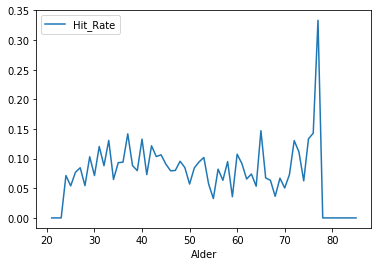

,Alder,Ja,Nej,Hit_Rate
Alder,,,,
77.0,77.0,1,2,0.333333
65.0,65.0,20,116,0.147059
76.0,76.0,1,6,0.142857
37.0,37.0,19,115,0.141791
75.0,75.0,2,13,0.133333
40.0,40.0,19,124,0.132867
33.0,33.0,20,133,0.130719
72.0,72.0,3,20,0.130435
42.0,42.0,18,130,0.121622


In [4]:
# PERFORMANCE AGE

df_age = pd.read_csv('data.csv')

# Only calls that are hits or none hits
df_age = pd.concat([df_age.loc[df_age['Utfall'] == 'Bokning'], df_age[df_age['Utfall'] == 'Nej']])

# Aggregate data on location
aggregation_functions = {'Alder': 'first', 'Ja': 'sum', 'Nej': 'sum'}

# Group data by location
df_age = df_age.groupby(df_age['Alder']).aggregate(aggregation_functions)

# Calculate hit rate per age
df_age['Hit_Rate'] = df_age['Ja'] / (df_age['Nej'] + df_age['Ja'])

# Plot histogram
ax = df_age.plot(x='Alder', y='Hit_Rate')
plt.show()

# Sort by hit rate
df_age = df_age.sort_values(by=['Hit_Rate'], ascending=False)

# Plot table
df_age


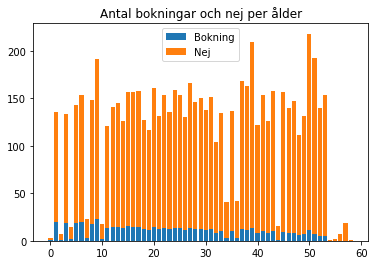

In [5]:
ind = np.arange(len(df_age))
width = 0.8 # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df_age["Ja"], width)
p2 = plt.bar(ind, df_age["Nej"], width, bottom=df_age["Ja"])

plt.title('Antal bokningar och nej per ålder')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Bokning', 'Nej'))

plt.show()

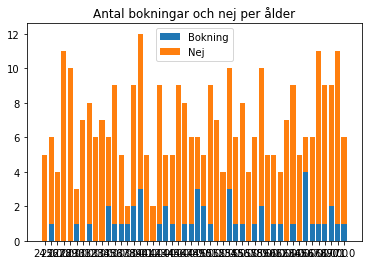

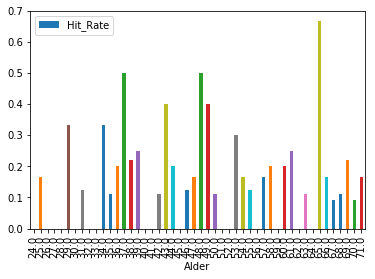

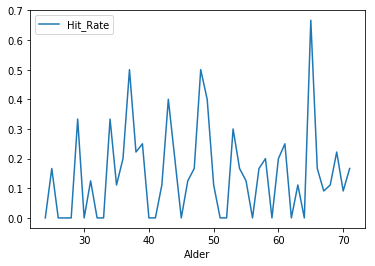

,Alder,Ja,Nej,Hit_Rate
Alder,,,,
65.0,65.0,4,2,0.666667
48.0,48.0,3,3,0.500000
37.0,37.0,1,1,0.500000
43.0,43.0,2,3,0.400000
49.0,49.0,2,3,0.400000
34.0,34.0,2,4,0.333333
29.0,29.0,1,2,0.333333
53.0,53.0,3,7,0.300000
61.0,61.0,1,3,0.250000


In [6]:
from pprint import pprint

# PERFORMANCE PER USER AND AGE 

df_csv = pd.read_csv('data.csv')

# User ID
#user = 145
user = 186

# Get only data for the specific user
user_perf = df_csv.loc[df_csv['User_ID'] == user]

# Only calls that are hits or none hits
user_perf = pd.concat([user_perf.loc[user_perf['Utfall'] == 'Bokning'], user_perf[user_perf['Utfall'] == 'Nej']])

# Aggregate data on age
aggregation_functions = {'Alder': 'first', 'Ja': 'sum', 'Nej': 'sum'}

# Group data by age
user_perf = user_perf.groupby(user_perf['Alder'], as_index=False).aggregate(aggregation_functions)

# Calculate hit rate per age
user_perf['Hit_Rate'] = user_perf['Ja'] / (user_perf['Nej'] + user_perf['Ja'])

user_perf = user_perf.groupby(user_perf['Alder']).mean()

# Number of yes and no's
ind = np.arange(len(user_perf))
num_yes = plt.bar(ind, user_perf["Ja"], 0.8)
num_no = plt.bar(ind, user_perf["Nej"], 0.8, bottom=user_perf["Ja"])

plt.title('Antal bokningar och nej per ålder')
plt.legend((num_yes[0], num_no[0]), ('Bokning', 'Nej'))
plt.xticks(ind, user_perf['Alder'])
#plt.yticks()

plt.show()


# Plot histogram
ax = user_perf.plot.bar(x='Alder', y='Hit_Rate')
plt.show()

# Plot diagram
ax = user_perf.plot(x='Alder', y='Hit_Rate')
fig = plt.show()

# Sort by hit rate
user_perf = user_perf.sort_values(by=['Hit_Rate'], ascending=False)

# Plot table
user_perf

In [7]:
# PERFORMANCE PER USER AND LOCATION

df_location = pd.read_csv('data.csv')

# User ID
user = 145

# Get only data for the specific user
user_location = df_location.loc[df_csv['User_ID'] == user]

# Only calls that are hits or none hits
user_location = pd.concat([user_location.loc[user_location['Utfall'] == 'Bokning'], user_location[user_location['Utfall'] == 'Nej']])

# Aggregate data on location
aggregation_functions = {'User_ID': 'first', 'Postadress_ort': 'first', 'Ja': 'sum', 'Nej': 'sum'}

# Group data by location
user_location = user_location.groupby(user_location['Ort']).aggregate(aggregation_functions)

# Calculate hit rate per location
user_location['Hit_Rate'] = user_location['Ja'] / (user_location['Nej'] + user_location['Ja'])

# Plot histogram
ax = user_location.plot.bar(x='Ort', y='Hit_Rate')
plt.show()

# Sort by hit rate
user_location = user_location.sort_values(by=['Hit_Rate'], ascending=False)

# Plot table
user_location


/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'Postadress_ort'